Exo Time .... Attrapes-moi si tu peux 
Contexte

On appelle graphe la donnée d'un ensemble de points appelés sommets et d'un ensemble de lignes appelées arêtes qui relient certains sommets entre eux.

Les bases

Le nombre de sommets d'un graphe s'appelle l'ordre du graphe.
 - Deux sommets reliés entre eux par une arête sont dits adjacents.
 - Le degré d'un sommet est le nombre d'arêtes issues de ce sommet.
 - Un sommet qui n'est adjacent à aucun autre sommet du graphe est dit isolé.

Un graphe est dit complet si deux sommets quelconques distincts sont toujours adjacents. Autrement dit, tous les sommets sont reliés deux à deux par une arête. Un graphe peut être orienté ou non-orienté. Dans un graphe orienté, chaque arête ne peut-être parcourue que dans un seul sens indiqué par une flèche. Un graphe (orienté ou non-orienté) peut contenir des boucles c'est-à-dire une arête dont l'origine et l'extrémité correspondent au même sommet (on a par exemple une boucle B sur la représentation précédente).

Posons le problème

Une possibilité pour représenter un graphe avec Python est d'utiliser un dictionnaire qui, à chaque sommet, associe un sous-dictionnaire composé de ses sommets adjacents associés à la pondération de l'arête incidente  
Graphe_ = { 
     'A':{'B':2, 'C':1}, 
     'B':{'A':2, 'C':2, 'D':1, 'E':3}, 
     'C':{'A':1, 'B':2, 'D':4, 'E':3, 'F':5}, 
     'D':{'B':1, 'C':4, 'E':3, 'F':6, 'G':5}, 
     'E':{'B':3, 'C':3, 'D':3, 'F':1}, 
     'F':{'C':5, 'D':6, 'E':1, 'G':2}, 
     'G':{'D':5, 'F':2} }

Ainsi Graphe'A' est le poids de l'arête incidente à A et B.(modifié)

[12:56]
Le parcours d'une telle structure permet de remplir ou vider deux dictionnaires. Le premier qui se remplira au fur et à mesure contiendra les sommets explorés (par exemple s_explore) et le second qui se videra au fur et à mesure contiendra les sommets à explorer (par exemple s_a_explorer).

Certains problèmes consistent à chercher entre deux points donnés le parcours qui a une "longueur" (durée, coût, distance) minimum.
Ces problèmes se ramènent à la recherche d'une chaîne ou d'un chemin de plus faible pondération entre deux sommets d'un graphe pondéré (les pondérations des arêtes étant toutes positives). On parlera de plus courte distance en interprétant les pondérations comme des distances entre les sommets.

1. Suivant le graphe (Graphe_) définit précédemment, écrire les fonctions permettant de parcourir tous les nœuds de ce graphe, décrire ce que fait réellement votre fonction.

2.Trouver 2 manière de parcourir un graphe de A à G. Quelle est la longueur de votre parcours

3. Proposer une fonction qui permet de passer en argument "de quel point à quel point" on souhaite aller et une fonction qui permet d'afficher par quel point l'algorithme est allé, et quelle distance le parcours de l'algorithme représente.

3. Un algorithme appelé "Dijkstra" permet de résoudre ce type de problème dans les graphes pondérés connexes et à pondérations positives. Implémenter cet algorithme.

In [2]:
Graphe_ = { 'A':{'B':2, 'C':1}, 'B':{'A':2, 'C':2, 'D':1, 'E':3}, 'C':{'A':1, 'B':2, 'D':4, 'E':3, 'F':5}
           , 'D':{'B':1, 'C':4, 'E':3, 'F':6, 'G':5}, 'E':{'B':3, 'C':3, 'D':3, 'F':1}
           , 'F':{'C':5, 'D':6, 'E':1, 'G':2}, 'G':{'D':5, 'F':2} }
print(Graphe_.keys())
Graphe_['A']

dict_keys(['A', 'B', 'C', 'D', 'E', 'F', 'G'])


{'B': 2, 'C': 1}

# Representation du Graphe_

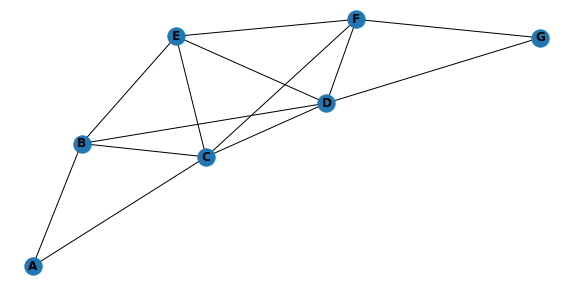

In [55]:
import networkx as nx
g = nx.Graph()
for i, j in Graphe_.items():
    for k in j:
        g.add_edge( i,k )
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(10,5))
nx.draw(g, ax = ax, with_labels=True, font_weight='bold')

# Parcour en largeur

In [3]:
def bfs(G, S):
    couleur = dict()
    for x in G :
        couleur[x] = 'blanc'
    P = dict()
    P[S] = None
    couleur[S] = 'gris'
    Q = [S]
    while Q :
        u = Q[0]
        for v in G[u]:
            if couleur[v] == 'blanc':
                P[v] = u
                couleur[v] = 'gris'
                Q.append(v)
        Q.pop(0)
        couleur[u] = 'noir'
    return P

print(bfs(Graphe_, 'A'))
print(bfs(Graphe_, 'B'))
print(bfs(Graphe_, 'D'))
print(bfs(Graphe_, 'F'))

{'A': None, 'B': 'A', 'C': 'A', 'D': 'B', 'E': 'B', 'F': 'C', 'G': 'D'}
{'B': None, 'A': 'B', 'C': 'B', 'D': 'B', 'E': 'B', 'F': 'C', 'G': 'D'}
{'D': None, 'B': 'D', 'C': 'D', 'E': 'D', 'F': 'D', 'G': 'D', 'A': 'B'}
{'F': None, 'C': 'F', 'D': 'F', 'E': 'F', 'G': 'F', 'A': 'C', 'B': 'C'}


# Mes propres fonctions pour le Parcour en Largeur

In [61]:
# def parcour_largeur(Graph_, 'A')

# créer le marqueur(initialiser les sommets à False) en dictionnaire
def marque_dict(graph):
    KEYS = []
    DICTIONARY = {} 
    for i in graph.keys():
        KEYS.append(i)
        for each in KEYS:
            DICTIONARY[each]=False
    return DICTIONARY
marque = marque_dict(Graphe_)#marque={'A':False,'B':False,'C':False,'D':False,'E':False,'F':False,'G':False}
print("marque avant l'application de la fonction parcour_largeur = ", '\n',marque)
print(("--------------------------------------------"))

file=[]
visite=[]

def parcour_largeur(graph, sommet):
    marque[sommet]=True
    #sommet ='A'
    file = [sommet]
    file.append(sommet)
    
    while len(file)!=0:
        u=file[0]
        for v in Graphe_[u]:
            if marque[v] == False:
                marque[v]=True
                file.extend(v) 
                visite.extend(v)      
        file.pop(0)
    return print("Parcour en largeur avec comme sommet de départ {} ".format(sommet),'\n',"Résultat filnal file = {} ".format(file),'\n',"Résulat final marque ={}".format(marque),'\n',"Résultat final visité = {}".format(visite))

#print(parcour_largeur(Graphe_,'A'))
#print(parcour_largeur(Graphe_,'B'))
print(parcour_largeur(Graphe_,'F'))

marque avant l'application de la fonction parcour_largeur =  
 {'A': False, 'B': False, 'C': False, 'D': False, 'E': False, 'F': False, 'G': False}
--------------------------------------------
Parcour en largeur avec comme sommet de départ F  
 Résultat filnal file = []  
 Résulat final marque ={'A': True, 'B': True, 'C': True, 'D': True, 'E': True, 'F': True, 'G': True} 
 Résultat final visité = ['C', 'D', 'E', 'G', 'A', 'B']
None


# Parcour en Profondeur

In [35]:

def dfs(G,s) :
    couleur=dict()
    for v in G :couleur[v]='blanc'
    P=dict()
    P[s]=None
    couleur[s]='gris'
    Q=[s]
    while Q :
        u=Q[-1]
        R=[y for y in G[u] if couleur[y]=='blanc']
        if R :
            v=R[0]
            couleur[v]='gris'
            P[v]=u
            Q.append(v)
        else :
            Q.pop()
            couleur[u]='noir'
    return P

print(dfs(Graphe_, 'A'))
print(dfs(Graphe_, 'B'))
print(dfs(Graphe_, 'D'))
print(dfs(Graphe_, 'F'))
print(dfs(Graphe_, 'C'))


{'A': None, 'B': 'A', 'C': 'B', 'D': 'C', 'E': 'D', 'F': 'E', 'G': 'F'}
{'B': None, 'A': 'B', 'C': 'A', 'D': 'C', 'E': 'D', 'F': 'E', 'G': 'F'}
{'D': None, 'B': 'D', 'A': 'B', 'C': 'A', 'E': 'C', 'F': 'E', 'G': 'F'}
{'F': None, 'C': 'F', 'A': 'C', 'B': 'A', 'D': 'B', 'E': 'D', 'G': 'D'}
{'C': None, 'A': 'C', 'B': 'A', 'D': 'B', 'E': 'D', 'F': 'E', 'G': 'F'}


# Mes propres fonctions pour le Parcour en Profondeur

In [59]:
# def parcour_profondeur(Graph_, 'A') en pile

# créer le marqueur(initialiser les sommets à False) en dictionnaire
def marque_dict(graph):
    KEYS = []
    DICTIONARY = {} 
    for i in graph.keys():
        KEYS.append(i)
        for each in KEYS:
            DICTIONARY[each]=False
    return DICTIONARY
marque = marque_dict(Graphe_)#marque={'A':False,'B':False,'C':False,'D':False,'E':False,'F':False,'G':False}
print("marque avant l'application de la fonction parcour_largeur = ", '\n',marque)
print("---------------------------------------------")



def parcour_profondeur(graph, sommet):
    marque[sommet]=True
    pile = []
    pile.append(sommet)
    visite=[]
    while len(pile)!=0:
        u=pile[-1]
        for v in Graphe_[u]:
            if marque[v] == False:
                marque[v]=True
                pile.append(v) 
                visite.append(v)      
        pile.pop()
    return print("Parcour en largeur avec comme sommet de départ {} ".format(sommet),'\n',"Résultat filnal pile = {} ".format(pile),'\n',"Résulat final marque ={}".format(marque),'\n',"Résultat final visité = {}".format(visite))

#print(parcour_profondeur(Graphe_,'A'))
#print(parcour_profondeur(Graphe_,'B'))
#print(parcour_profondeur(Graphe_,'D'))
#print(parcour_profondeur(Graphe_,'F'))
#print(parcour_profondeur(Graphe_,'C'))

marque avant l'application de la fonction parcour_largeur =  
 {'A': False, 'B': False, 'C': False, 'D': False, 'E': False, 'F': False, 'G': False}
---------------------------------------------
Parcour en largeur avec comme sommet de départ C  
 Résultat filnal pile = []  
 Résulat final marque ={'A': True, 'B': True, 'C': True, 'D': True, 'E': True, 'F': True, 'G': True} 
 Résultat final visité = ['A', 'B', 'D', 'E', 'F', 'G']
None


# Distance parcour en largeur 

In [460]:
# distance Largeur

from collections import deque

def distance_largeur(graph, start):
 
    visited = []
    queue = deque()
    queue.append(start)
    ite_test1 = 0
    dist = []

    while queue:
        node = queue.popleft()
        if node not in visited:
            visited.append(node)
            unvisited = [n for n in graph[node] if n not in visited]
            queue.extend(unvisited)
        #calculer le nombre d'itérations
        
        def calcul_iteration():
            ite_test1 = 0
            for ite in test1(0):
                ite_test1 += 1
                dist = [ite_test1]
            return dist
        dist.append(ite_test1)
    return len(dist)

print(print('distance = ', distance_largeur(Graphe_, 'F')))

distance =  14
None


# Distance avec ma propre fonction

In [40]:
# def parcour_largeur(Graph_, 'A')

# créer le marqueur(initialiser les sommets à False) en dictionnaire
def marque_dict(graph):
    KEYS = []
    DICTIONARY = {} 
    for i in graph.keys():
        KEYS.append(i)
        for each in KEYS:
            DICTIONARY[each]=False
    return DICTIONARY
marque = marque_dict(Graphe_)#marque={'A':False,'B':False,'C':False,'D':False,'E':False,'F':False,'G':False}
#print("marque avant l'application de la fonction parcour_largeur = ", '\n',marque)
file=[]
visite=[]



def parcour_largeur(graph, sommet):
    marque[sommet]=True
    file = [sommet]
    file.append(sommet)
    distance = 0
    
    while len(file)!=0:
        u=file[0]
        distance = len(visite) + 1
        for v in Graphe_[u]:
            if marque[v] == False:
                marque[v]=True
                file.extend(v) 
                visite.extend(v)

        file.pop(0)
        
    return print("Distance du parcour en largeur = {} ".format(distance))

print(parcour_largeur(Graphe_,'A'))
#print(parcour_largeur(Graphe_,'B'))
#print(parcour_largeur(Graphe_,'F'))

Distance du parcour en largeur = 7 
None


# Distance parcour en profondeur

In [62]:
# def parcour_profondeur(Graph_, 'A') en pile

# créer le marqueur(initialiser les sommets à False) en dictionnaire
def marque_dict(graph):
    KEYS = []
    DICTIONARY = {} 
    for i in graph.keys():
        KEYS.append(i)
        for each in KEYS:
            DICTIONARY[each]=False
    return DICTIONARY
marque = marque_dict(Graphe_)#marque={'A':False,'B':False,'C':False,'D':False,'E':False,'F':False,'G':False}
print("marque avant l'application de la fonction parcour_largeur = ", '\n',marque)
print("---------------------------------------------")
pile=[]
visite=[]
#marque[sommet]=True
#sommet ='A'
#file.append(sommet)


def parcour_profondeur(graph, sommet):
    marque[sommet]=True
    #sommet ='A'
    pile = []
    visite=[]
    pile.append(sommet)
    distance1 = 0
    
    while len(pile)!=0:
        u=pile[-1]
        distance1 = len(visite) + 1
        for v in Graphe_[u]:
            #visite.extend(sommet)
            if marque[v] == False:
                marque[v]=True
                pile.append(v) 
                visite.append(v)      
        pile.pop()
    return print("Distance du parcour en profondeur = {} ".format(distance1))

#print(parcour_profondeur(Graphe_,'A'))
print(parcour_profondeur(Graphe_,'B'))
#print(parcour_profondeur(Graphe_,'D'))
#print(parcour_profondeur(Graphe_,'F'))
##print(parcour_profondeur(Graphe_,'C'))

marque avant l'application de la fonction parcour_largeur =  
 {'A': False, 'B': False, 'C': False, 'D': False, 'E': False, 'F': False, 'G': False}
---------------------------------------------
Distance du parcour en profondeur = 7 
None


# Afficher tous les chemin possibles (largeur)

In [51]:
from collections import deque


def chemin_largeur(graph, start, end):

    queue = deque()
    queue.append((start, [start]))

    while queue:
        node, path = queue.popleft()
        adjacent_nodes = [n for n in graph[node] if n not in path]
        for adjacent_node in adjacent_nodes:
            if adjacent_node == end:
                yield path + [adjacent_node]
            else:
                queue.append((adjacent_node, path + [adjacent_node]))

    return queue
                
print("Le nombre de chemin possible(largeur) = ",len(list(chemin_largeur(Graphe_, 'A', 'C'))))
#print(list(chemin_largeur(Graphe_, 'A', 'C')))
for i in chemin_largeur(Graphe_,'A','F'):
    print(i)

Le nombre de chemin possible(largeur) =  16
['A', 'C', 'F']
['A', 'B', 'C', 'F']
['A', 'B', 'D', 'F']
['A', 'B', 'E', 'F']
['A', 'C', 'D', 'F']
['A', 'C', 'E', 'F']
['A', 'B', 'C', 'D', 'F']
['A', 'B', 'C', 'E', 'F']
['A', 'B', 'D', 'C', 'F']
['A', 'B', 'D', 'E', 'F']
['A', 'B', 'D', 'G', 'F']
['A', 'B', 'E', 'C', 'F']
['A', 'B', 'E', 'D', 'F']
['A', 'C', 'B', 'D', 'F']
['A', 'C', 'B', 'E', 'F']
['A', 'C', 'D', 'E', 'F']
['A', 'C', 'D', 'G', 'F']
['A', 'C', 'E', 'D', 'F']
['A', 'B', 'C', 'D', 'E', 'F']
['A', 'B', 'C', 'D', 'G', 'F']
['A', 'B', 'C', 'E', 'D', 'F']
['A', 'B', 'D', 'C', 'E', 'F']
['A', 'B', 'D', 'E', 'C', 'F']
['A', 'B', 'E', 'C', 'D', 'F']
['A', 'B', 'E', 'D', 'C', 'F']
['A', 'B', 'E', 'D', 'G', 'F']
['A', 'C', 'B', 'D', 'E', 'F']
['A', 'C', 'B', 'D', 'G', 'F']
['A', 'C', 'B', 'E', 'D', 'F']
['A', 'C', 'D', 'B', 'E', 'F']
['A', 'C', 'E', 'B', 'D', 'F']
['A', 'C', 'E', 'D', 'G', 'F']
['A', 'B', 'C', 'E', 'D', 'G', 'F']
['A', 'B', 'E', 'C', 'D', 'G', 'F']
['A', 'C', 'B', '

# Le chemin le plus court (largeur)

In [63]:
from collections import deque


def chemin_largeur(graph, start, end):

    queue = deque()
    queue.append((start, [start]))

    while queue:
        node, path = queue.popleft()
        adjacent_nodes = [n for n in graph[node] if n not in path]
        for adjacent_node in adjacent_nodes:
            if adjacent_node == end:
                return path + [adjacent_node]#j'ai remplacé yield par return afin d'avoir le chemin le plus court
            else:
                queue.append((adjacent_node, path + [adjacent_node]))
                #print(queue)
    return list(queue)
                

print("Le chemin le plus court(largeur) : ",chemin_largeur(Graphe_,'A','F'))

Le chemin le plus court(largeur) :  ['A', 'C', 'F']


# Afficher tous les chemin possibles (profondeur)

In [21]:
from collections import deque

def chemin_profondeur(graph, start, end):

    stack = deque()
    stack.append((start, [start]))

    while stack:
        (node, path) = stack.pop()
        adjacent_nodes = [n for n in graph[node] if n not in path]
        for adjacent_node in adjacent_nodes:
            if adjacent_node == end:
                yield path + [adjacent_node]
            else:
                stack.append((adjacent_node, path + [adjacent_node]))
        
print("Le nombre de chemin possible(profondeur) = ",len(list(chemin_profondeur(Graphe_, 'A', 'F'))))

for i in chemin_profondeur(Graphe_,'A', 'F'):
    print(i)

Le nombre de chemin possible(profondeur) =  36
['A', 'C', 'F']
['A', 'C', 'E', 'F']
['A', 'C', 'E', 'D', 'F']
['A', 'C', 'E', 'D', 'G', 'F']
['A', 'C', 'E', 'B', 'D', 'F']
['A', 'C', 'E', 'B', 'D', 'G', 'F']
['A', 'C', 'D', 'F']
['A', 'C', 'D', 'G', 'F']
['A', 'C', 'D', 'E', 'F']
['A', 'C', 'D', 'B', 'E', 'F']
['A', 'C', 'B', 'E', 'F']
['A', 'C', 'B', 'E', 'D', 'F']
['A', 'C', 'B', 'E', 'D', 'G', 'F']
['A', 'C', 'B', 'D', 'F']
['A', 'C', 'B', 'D', 'G', 'F']
['A', 'C', 'B', 'D', 'E', 'F']
['A', 'B', 'E', 'F']
['A', 'B', 'E', 'D', 'F']
['A', 'B', 'E', 'D', 'G', 'F']
['A', 'B', 'E', 'D', 'C', 'F']
['A', 'B', 'E', 'C', 'F']
['A', 'B', 'E', 'C', 'D', 'F']
['A', 'B', 'E', 'C', 'D', 'G', 'F']
['A', 'B', 'D', 'F']
['A', 'B', 'D', 'G', 'F']
['A', 'B', 'D', 'E', 'F']
['A', 'B', 'D', 'E', 'C', 'F']
['A', 'B', 'D', 'C', 'F']
['A', 'B', 'D', 'C', 'E', 'F']
['A', 'B', 'C', 'F']
['A', 'B', 'C', 'E', 'F']
['A', 'B', 'C', 'E', 'D', 'F']
['A', 'B', 'C', 'E', 'D', 'G', 'F']
['A', 'B', 'C', 'D', 'F']
['A'

# Le chemin le plus court (profondeur)

In [26]:
from collections import deque

def chemin_profondeur(graph, start, end):

    stack = deque()
    stack.append((start, [start]))

    while stack:
        (node, path) = stack.pop()
        adjacent_nodes = [n for n in graph[node] if n not in path]
        for adjacent_node in adjacent_nodes:
            if adjacent_node == end:
                return path + [adjacent_node]
            else:
                stack.append((adjacent_node, path + [adjacent_node]))
        

print("Le chemin le plus court(profondeur) :",chemin_profondeur(Graphe_, 'A', 'F'))

Le chemin le plus court(profondeur) : ['A', 'C', 'F']


# Algorithme de "Dijkstra" 

In [38]:
def moore_dijkstra_1(G, s):
    inf = sum(sum(G[sommet][i] for i in G[sommet]) for sommet in G) + 1
        #On considère comme "infini" un majorant de la somme de toutes les
        #pondérations du graphe
    s_explore = {s : [0, [s]]}
        #On associe au sommet d'origine s la liste [longueur, plus court chemin]
    s_a_explorer = {j : [inf, ""] for j in G if j != s}
        #On associe à chaque sommet j à explorer la liste [longueur, sommet précédent]
    for suivant in G[s]:
        s_a_explorer[suivant] = [G[s][suivant], s]

    print("Dans le graphe d\'origine {} dont les arcs sont :".format(s))
    for k in G:
        print(k, ":", G[k])
    print()
    print("Plus courts chemin de")

    #On créé une boucle qui tourne tant que la liste des sommets à explorer contient
    #des points tels que la longueur provisoire calculée depuis l'origine est
    #inférieure à l'infini
    while s_a_explorer and any(s_a_explorer[k][0] < inf for k in s_a_explorer):
        s_min = min(s_a_explorer, key = s_a_explorer.get)
        longueur_s_min, precedent_s_min = s_a_explorer[s_min]
        for successeur in G[s_min]:
            if successeur in s_a_explorer:
                dist = longueur_s_min + G[s_min][successeur]
                if dist < s_a_explorer[successeur][0]:
                    s_a_explorer[successeur] = [dist, s_min]
        s_explore[s_min] = [longueur_s_min, s_explore[precedent_s_min][1] + [s_min]]
        del s_a_explorer[s_min]
        print("longueur", longueur_s_min, ":", " -> ".join(s_explore[s_min][1]))

    for k in s_a_explorer:
        print("Il n\'y a aucun chemin de {} à {}".format(s, k))
    print()

    return s_explore




moore_dijkstra_1(Graphe_, 'A')

Dans le graphe d'origine A dont les arcs sont :
A : {'B': 2, 'C': 1}
B : {'A': 2, 'C': 2, 'D': 1, 'E': 3}
C : {'A': 1, 'B': 2, 'D': 4, 'E': 3, 'F': 5}
D : {'B': 1, 'C': 4, 'E': 3, 'F': 6, 'G': 5}
E : {'B': 3, 'C': 3, 'D': 3, 'F': 1}
F : {'C': 5, 'D': 6, 'E': 1, 'G': 2}
G : {'D': 5, 'F': 2}

Plus courts chemin de
longueur 1 : A -> C
longueur 2 : A -> B
longueur 3 : A -> B -> D
longueur 4 : A -> C -> E
longueur 5 : A -> C -> E -> F
longueur 7 : A -> C -> E -> F -> G



{'A': [0, ['A']],
 'C': [1, ['A', 'C']],
 'B': [2, ['A', 'B']],
 'D': [3, ['A', 'B', 'D']],
 'E': [4, ['A', 'C', 'E']],
 'F': [5, ['A', 'C', 'E', 'F']],
 'G': [7, ['A', 'C', 'E', 'F', 'G']]}

# Algorithme de "Dijkstra"  d'un sommet à un autre

In [64]:
from math import inf



def mini(listeSommets, marque):
    """
    Renvoie le sommet de listeSommets
    ayant la plus petite marque.
    """
    marquePlusPetite = inf
    for s in listeSommets:
        if marque[s] < marquePlusPetite:
            marquePlusPetite = marque[s]
            sommetPlusPetit = s
    return sommetPlusPetit


def dijkstra(graphe, depart, arrivee):

    # initialisation
    marque = {}
    for sommet in graphe: marque[sommet] = inf
    marque[depart] = 0

    non_selectionnes = [sommet for sommet in graphe]

    pere = {}
    pere[depart] = None

    # boucle principale:
    while non_selectionnes:
        # sélection:
        s = mini(non_selectionnes, marque)
        if s == arrivee: break
        non_selectionnes.remove(s)

        # mise à jour des voisins du sommet sélectionné:
        VoisinsAVisiter = [sommet for sommet in graphe[s] if sommet in non_selectionnes]
        for sommet in VoisinsAVisiter:
            p = marque[s] + graphe[s][sommet]
            if p < marque[sommet]:
                marque[sommet] = p
                pere[sommet] = s
    print("p =",pere)
    print("marque=",marque)
    return marque, pere


def affichageCheminMin(graphe, depart, arrivee):
    distance, pere = dijkstra(graphe, depart, arrivee)
    print("La distance de {} à {} est de longueur {}.".format(depart, arrivee, distance[arrivee]))
    chemin = arrivee
    sommet = arrivee
    while pere[sommet] != None:
        chemin = pere[sommet] + chemin
        sommet = pere[sommet]
    print()
    print("Le chemin de {} à {}: {}.".format(depart, arrivee,chemin))


affichageCheminMin(Graphe_, 'A', 'F')

p = {'A': None, 'B': 'A', 'C': 'A', 'D': 'B', 'E': 'C', 'F': 'E', 'G': 'D'}
marque= {'A': 0, 'B': 2, 'C': 1, 'D': 3, 'E': 4, 'F': 5, 'G': 8}
La distance de A à F est de longueur 5.

Le chemin de A à F: ACEF.
